# Asset management : risque de marché

Cheryl Kouadio  
Sous la supervision de : Faiçal HIHI  
2025-01-27

La gestion d’actifs (ou *asset management*) est l’art de gérer un
portefeuille d’actifs financiers. Il s’agit de gérer l’argent de clients
— particuliers ou institutionnels — avec pour objectif principal de
maximiser le rendement tout en minimisant le risque.

**Les étapes usuelles de gestion du risque**

1.  Identification des risques

On distingue généralement quatre grandes catégories de risques :

-   Risque de marché : risque de perte en capital dû à la variation des
    prix des actifs financiers.
-   Risque de crédit : risque de défaut d’un émetteur, par exemple une
    entreprise qui ne rembourse pas ses obligations.
-   Risque de liquidité : risque de ne pas pouvoir acheter ou vendre
    rapidement un actif sans influencer son prix de manière
    significative.
-   Risque opérationnel : risque de perte résultant de processus
    internes défaillants, d’erreurs humaines ou de pannes de systèmes.

1.  Métriques de risque

Ce sont des mesures quantitatives du risque. Parmi les plus utilisées :
la volatilité, qui mesure la variation des rendements d’un actif par
rapport à sa moyenne; la Value at Risk (VaR), qui mesure la perte
maximale anticipée sur un portefeuille, avec un certain niveau de
confiance $\alpha$, sur un horizon $T$, la Tracking Error, qui mesure
l’écart de performance entre un portefeuille et son indice de référence.

1.  Encadrement du risque

Il s’agit de mettre en place des règles de gestion ou des limites pour
éviter des dérives du portefeuille. Cela peut inclure :

-   des limites de taille de position,
-   la diversification (éviter la concentration sur un petit nombre
    d’actifs),
-   l’usage de produits dérivés (options, futures) pour se couvrir
    contre les risques identifiés.

**Constitution du portefeuille**

Dans notre étude, nous allons constituer un portefeuille de 10 actions
choisies dans l’indice CAC 40, en leur attribuant des poids aléatoires.

Les actifs retenus sont les suivants : - Sanofi  
- Société Générale  
- Thales  
- Engie  
- Capgemini  
- Carrefour  
- Orange  
- Accor  
- L’Oréal  
- Crédit Agricole

Puisque nous travaillons avec un portefeuille d’actions, donc le
principal risque est le risque de marché actions. Nous allons donc nous
intéresser à trois indicateurs de risque : - la volatilité ex-ante, - la
Value at Risk ex-ante, - la Tracking Error ex-ante  
c’est-à-dire des mesures anticipées, basées sur la composition actuelle
du portefeuille, et non sur des données historiques (ex-post).

## Récupération des données

In [2]:
#------------------------------------#
#---------- Package Imports ---------#
#------------------------------------#

import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta
import yfinance as yf 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

In [3]:
def get_data(start_date, end_date, index_ticker, tickers):
    """
    Extraction de données de cours d'actions
    """
    # Extraction des prix historiques des composants
    data = yf.download(tickers, start=start_date, end=end_date, auto_adjust =True)['Close']

    # Extraction des prix historiques de l'indice CAC 40
    index = yf.download(index_ticker, start=start_date, end=end_date, auto_adjust =True)['Close']

    return {
        "portfolio_data": data,
        "benchmark_data": index,
    }

In [4]:
end_date = pd.to_datetime("2025-01-27")
start_date = end_date - timedelta(days=2*365)

selected_assets = {
    "SAN.PA" : "Sanofi",
    "GLE.PA" : "Société générale",
    "HO.PA" : "Thales",
    "ENGI.PA" : "Engie",
    "CAP.PA" : "Capgemini",
    "CA.PA" : "Carrefour",
    "ORA.PA" : "Orange",
    "AC.PA" : "Accor",
    "OR.PA" : "L'Oreal",
    "ACA.PA" : "Crédit agricole"
}

index = "^FCHI"

assets_ticker  = list(selected_assets.keys())

data = get_data(start_date,end_date, index, assets_ticker)

[                       0%                       ][                       0%                       ][                       0%                       ][                       0%                       ][**********************50%                       ]  5 of 10 completed[**********************50%                       ]  5 of 10 completed[**********************50%                       ]  5 of 10 completed[**********************80%*************          ]  8 of 10 completed[**********************90%******************     ]  9 of 10 completed[*********************100%***********************]  10 of 10 completed
[*********************100%***********************]  1 of 1 completed

In [5]:
portfolio_data = data["portfolio_data"]
portfolio_data.tail()

In [6]:
benchmark_data = data["benchmark_data"]
benchmark_data.head()

In [7]:
# On attribue des poids équitables pour chaque action
weights_by_asset = {ticker: 1 / len(assets_ticker) for ticker in assets_ticker}

Pour connaitre la valeur totale des actifs du portefeuille, nous allons
utiliser la notion d’asset under management (AUM) défini comme suit :

$$
AUM(T_n) = \sum_{i=1}^{10} \omega_i \times P_i(T_n),
$$

où $\omega_i$ est le poids de l’actif $i$ dans le portefeuille et
$P_i(T_n)$ est le prix de l’actif $i$ à la date $T_n$.

Puisque les rendements sont les seuls facteurs de risque de l’AUM, nous
allons nous intéresser à la variation de l’AUM entre deux dates $T_n$ et
$T_{n+1}$, soit :

$$
\Delta AUM(T_n, T_{n+1}) = AUM(T_{n+1}) - AUM(T_n) = \sum_{i=1}^{10} \omega_i \times (P_i(T_{n+1}) - P_i(T_n)).
$$

In [8]:
aum_series = portfolio_data.apply(lambda row: sum(weights_by_asset[ticker] * row[ticker] for ticker in weights_by_asset), axis=1)
aum_series

AUM = pd.DataFrame(aum_series, columns=["AUM"])
AUM.head()

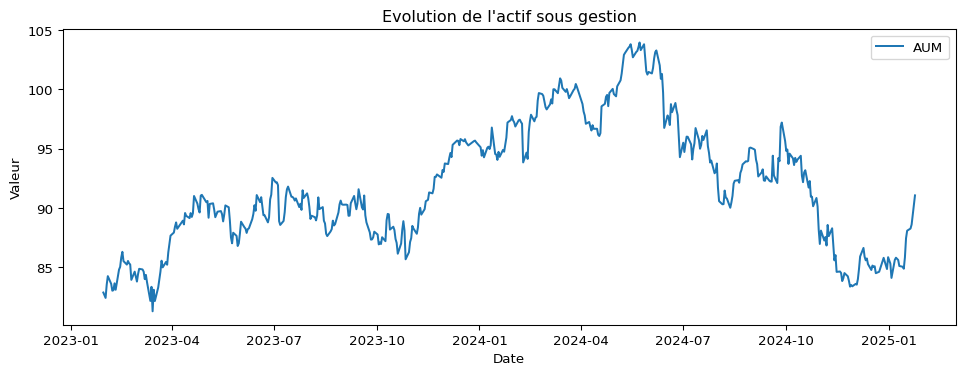

In [9]:
# --------------------------------------------- #
# Evolution de la valeur totale du portefeuille
# ---------------------------------------------- #

plt.figure(figsize=(12, 4))
plt.plot(AUM, label="AUM")
plt.title("Evolution de l'actif sous gestion")
plt.xlabel("Date")
plt.ylabel("Valeur")
plt.legend()
plt.show()

In [10]:
# On s'interesse aux variations/rendements de l'AUM
AUM["Variation"] = AUM["AUM"].pct_change()
AUM["Variation"].head()

Date
2023-01-30         NaN
2023-01-31   -0.002612
2023-02-01   -0.002862
2023-02-02    0.013532
2023-02-03    0.008618
Name: Variation, dtype: float64

### Estimation de la volatilité

Pour estimer la volatilité du portefeuille, on peut calculer
l’écart-type des variations de l’AUM. On fait le choix de calculer une
volatilité ex-ante en se basant sur les variation historiques des prix
des actifs avec une profondeur historique de 2 ans. Vu qu’on a une
volatilité quotidienne, on va l’annualiser en multipliant par
$\sqrt{252}$.

En général, sur le marché action, la volatilité quotidienne est environ
de 1% et la volatilité annuelle est entre 10% et 20%.

In [11]:
# Calcul de la volatilité du portefeuille
volatility_portfolio = np.std(AUM["Variation"])
annualized_volatility_portfolio = volatility_portfolio * np.sqrt(252)
print(f"Volatilité de la performance quotidienne : {volatility_portfolio : .2%}")
print(f"Volatilité de la performance annuelle : {annualized_volatility_portfolio : .2%}")

Volatilité de la performance quotidienne :  0.87%
Volatilité de la performance annuelle :  13.75%

In [12]:
# Calcul de la volatilité de l'indice CAC 40

benchmark_data["Variation"] = benchmark_data["^FCHI"].pct_change()
volatility_benchmark = np.std(benchmark_data["Variation"])
annualized_volatility_benchmark = volatility_benchmark * np.sqrt(252)

print(f"Volatilité de l'indice CAC 40 : {volatility_benchmark : .2%}")
print(f"Volatilité de l'indice CAC 40 annuelle : {annualized_volatility_benchmark : .2%}")

Volatilité de l'indice CAC 40 :  0.84%
Volatilité de l'indice CAC 40 annuelle :  13.37%

Notre portefeuille nous fournit une volatatilité quotidienne supérieure
de 3bps à la volatilité du CAC 40. On retrouve sur à peu près la même
volatilité du portefeuille et celle du CAC 40. Il y a donc une certaine
homogénéité dans le portefeuille que nous avons constitué.

> 💡 *Note : bp = 0,01%*

### Estimation de la tracking error/erreur de suivi

La tracking error est une mesure de l’écart entre la performance d’un
portefeuille et celle de son indice de référence. Elle est calculée
comme la volatilité de la différence entre les rendements du
portefeuille et de l’indice de référence :

$$
TE = \sqrt{Var(R_p - R_b)}
$$

La tracking error mesure l’incercitude du portefeuille par rapport à
l’indice de référence, c’est une mesure relative. Plus la tracking error
est élevée, plus le portefeuille est risqué. On ne souhaite sous ou
sur-performer l’indice de référence. On souhaite suivre véritablement
l’indice de référence.

Pour l’annualiser, on multiplie par $\sqrt{252}$ en supposant que les
performances quotidiennes sont indépendantes et donc un utilise
l’additivité des variances.

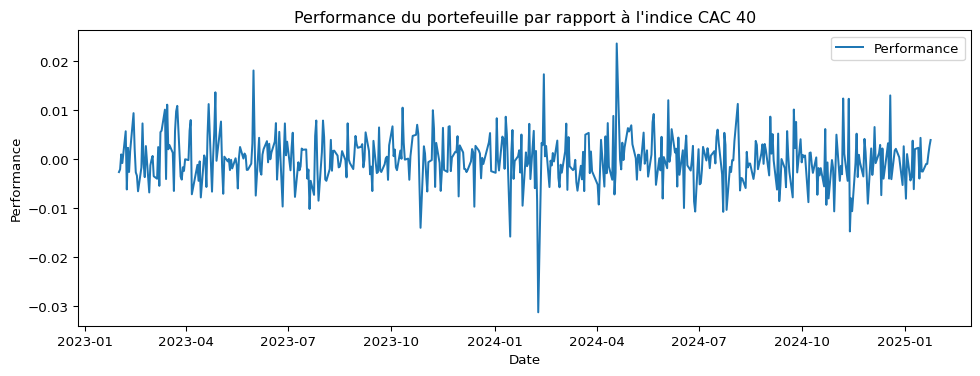

In [13]:
performance_relative = AUM["Variation"] - benchmark_data["Variation"]

plt.figure(figsize=(12, 4))
plt.plot(performance_relative, label="Performance")
plt.title("Performance du portefeuille par rapport à l'indice CAC 40")
plt.xlabel("Date")
plt.ylabel("Performance")
plt.legend()

plt.show()

In [14]:
# Calcul de la tracking error

TE = np.std(AUM["Variation"] - benchmark_data["Variation"]) 
print(f"Tracking error : {TE : .2%}")

TE_annualized = TE * np.sqrt(252)
print(f"Tracking error annualisé : {TE_annualized : .2%}")

Tracking error :  0.51%
Tracking error annualisé :  8.05%

### Estimation de la Value-at-Risk (VaR)

La VaR est une mesure de risque qui donne une estimation de la perte
maximale que l’on peut subir avec un certain niveau de confiance
$\alpha$ sur un horizon de temps donné. Par exemple, une VaR à 5% sur 1
jour de 1000 euros signifie que 95% du temps, on ne perdra pas plus de
1000 euros sur un jour.

$$P(\text{Loss} < \text{VaR}) = \alpha.$$

On peut également raisonner en terme de gain, i.e. Profit and Loss
(PnL).

$$P(\text{PnL} > - \text{VaR}) = \alpha.$$

La VaR peut se calculer suivant trois approches : 1. Approche historique
: On se base sur les rendements passés selon l’horizon fixé pour estimer
la VaR, à l’aide d’un quantile empirique d’ordre $\alpha$. Autrement, on
peut se baser sur les rendements journaliers et utiliser la méthode de
rescaling, i.e. $VaR = \sigma \times \Phi^{-1}(\alpha)$. 2. Approche
paramétrique : On suppose que les rendements suivent une loi normale. 3.
Approche Monte Carlo : On simule les rendements futurs.

Puisqu’on s’intéresse à un portefeuille d’actions qui a un indice de
référence, on peut également calculer la VaR relative. La VaR relative
suit une philosophie proche du tracking error. Elle se calcule sur les
écarts entre le portefeuille et le benchmark. Elle sert à mesurer de
combien mon portefeuille sous-performe par rapport à l’indice de
référence.

In [15]:
# --------------------------------- #
# VaR historique
# --------------------------------- #

seuil = 99/100

VaR_hist_portfolio = np.percentile(AUM["Variation"].dropna(), 100*(1- seuil))
print(f"VaR historique sur le portefeuille : {- VaR_hist_portfolio : .2%}")
print(f"VaR historique sur 20 jours sur le portefeuille : {-VaR_hist_portfolio*np.sqrt(20) : .2%}")

print("=*="*10)

VaR_hist_benchmark = np.percentile(benchmark_data["Variation"].dropna(), 100*(1 - seuil))
print(f"VaR historique sur l'indice CAC 40 : {-VaR_hist_benchmark : .2%}")
print(f"VaR historique sur 20 jours sur l'indice CAC 40 : {-VaR_hist_benchmark*np.sqrt(20) : .2%}")

VaR historique sur le portefeuille :  2.29%
VaR historique sur 20 jours sur le portefeuille :  10.25%
=*==*==*==*==*==*==*==*==*==*=
VaR historique sur l'indice CAC 40 :  2.13%
VaR historique sur 20 jours sur l'indice CAC 40 :  9.53%

In [16]:
# ---------------------------------- #
# VaR paramétrique
# ---------------------------------- #

# PnL ~ N(mu, sigma) ==> PnL = mu + sigma * Z, où Z ~ N(0,1)
# P(PnL > -VaR) = alpha <=> P(mu + sigma * Z > -VaR) = alpha <=> P(Z < (-VaR - mu) / sigma) = 1 - alpha
# Donc, -VaR = mu + sigma * quantile(1 - alpha), où quantile(1 - alpha) est le quantile de la loi normale standard


mu = np.mean(AUM["Variation"].dropna())
print(f"mu sur le portefeuille : {mu : .2}")
sigma = np.std(AUM["Variation"].dropna())
print(f"sigma sur le portefeuille : {sigma : .2}")

VaR_param_portfolio  = -(mu + sigma * norm.ppf(1 - seuil))

print(f"VaR paramétrique sur le portefeuille : {VaR_param_portfolio : .2%}")
print(f"VaR paramétrique sur 20 jours sur le portefeuille : {VaR_param_portfolio * np.sqrt(20): .2%}")

print("=*="*10)

mu = np.mean(benchmark_data["Variation"].dropna())
print(f"mu sur le benchmark: {mu : .2}")
sigma = np.std(benchmark_data["Variation"].dropna())
print(f"sigma sur le benchmark : {sigma : .2}")

VaR_param_benchmark  = -(mu + sigma * norm.ppf(1 - seuil))

print(f"VaR paramétrique sur le portefeuille : {VaR_param_benchmark : .2%}")
print(f"VaR paramétrique sur 20 jours sur le portefeuille : {VaR_param_benchmark * np.sqrt(20): .2%}")

mu sur le portefeuille :  0.00022
sigma sur le portefeuille :  0.0087
VaR paramétrique sur le portefeuille :  1.99%
VaR paramétrique sur 20 jours sur le portefeuille :  8.91%
=*==*==*==*==*==*==*==*==*==*=
mu sur le benchmark:  0.00026
sigma sur le benchmark :  0.0084
VaR paramétrique sur le portefeuille :  1.93%
VaR paramétrique sur 20 jours sur le portefeuille :  8.65%

In [17]:
# ---------------------------------- #
# VaR relative
# ---------------------------------- #

VaR_hist_relative = np.percentile(performance_relative.dropna(), 100*(1- seuil))
print(f"VaR historique relative : {- VaR_hist_relative : .2%}")
print(f"VaR historique relative sur 20 jours : {-VaR_hist_relative*np.sqrt(20) : .2%}")

print("=*="*10)

mu = np.mean(performance_relative.dropna())
print(f"mu des performances relatives: {mu : .2}")
sigma = np.std(performance_relative.dropna())
print(f"sigma des performances relatives : {sigma : .2}")

VaR_param_relative  = -(mu + sigma * norm.ppf(1 - seuil))

print(f"VaR paramétrique relative : {VaR_param_relative : .2%}")
print(f"VaR paramétrique relative sur 20 jours : {VaR_param_relative * np.sqrt(20): .2%}")

VaR historique relative :  1.07%
VaR historique relative sur 20 jours :  4.80%
=*==*==*==*==*==*==*==*==*==*=
mu des performances relatives: -3.5e-05
sigma des performances relatives :  0.0051
VaR paramétrique relative :  1.18%
VaR paramétrique relative sur 20 jours :  5.29%

# Stress test

Pour tester la robustesse du portefeuille, on peut réaliser des stress
tests. Ces tests permettent d’évaluer la performance du portefeuille
dans des conditions extrêmes de marché. Ils sont souvent utilisés pour
évaluer la résilience d’un portefeuille face à des événements de marché
inattendus ou extrêmes.

Ils sont de deux natures :

1.  Stress test historique : On soumet le portefeuille à une période
    historique ou on estime avoir eu une condition extrême (Covid,
    Subprime crisis). On rejoue un scénario qui s’est déjà passé.

2.  Stress test hypothétique : On joue un scénario qui ne s’est jamais
    réalisé. Exemple, si les actions chutent de 40%, notre portefeuille
    d’action chute de 40%.

Dans notre cas, nous allons réaliser un stress test historique sur la
crise de covid. Pour cela, nous allons extraire le prix des actifs du 19
février 2020 et du 18 mars 2020. Nous allons ensuite calculer la
performance du portefeuille sur cette période. On va également calculer
la performance du CAC 40 sur cette période pour voir si notre
portefeuille a été plus ou moins résilient que le marché.

In [18]:
# Recuperons les prix des actifs le 19/02/2020 et le 18/03/2020
# On va valoriser notre portefeuille à ces dates et calculer les performances
# A ces dates, le CAC 40 a connu de fortes pertes pendant la COVID-19


start_date = pd.to_datetime("19-02-2020", dayfirst=True)
end_date = start_date + timedelta(days=1)


data_1902 = get_data(start_date,end_date, index, assets_ticker)
portfolio_data_1902=data_1902["portfolio_data"]
benchmark_data_1902=data_1902['benchmark_data']

start_date = pd.to_datetime("18-03-2020", dayfirst=True)
end_date = start_date + timedelta(days=1)


data_1803 = get_data(start_date,end_date, index, assets_ticker)
portfolio_data_1803=data_1803["portfolio_data"]
benchmark_data_1803=data_1803['benchmark_data']

# Concaténer les données des deux dates pour le portefeuille et le benchmark
portfolio_data_stress = pd.concat([portfolio_data_1902, portfolio_data_1803], ignore_index=False)
benchmark_data_stress = pd.concat([benchmark_data_1902, benchmark_data_1803], ignore_index=False)

[                       0%                       ][**********            20%                       ]  2 of 10 completed[**************        30%                       ]  3 of 10 completed[**************        30%                       ]  3 of 10 completed[**************        30%                       ]  3 of 10 completed[**************        30%                       ]  3 of 10 completed[**************        30%                       ]  3 of 10 completed[**********************80%*************          ]  8 of 10 completed[**********************90%******************     ]  9 of 10 completed[*********************100%***********************]  10 of 10 completed
[*********************100%***********************]  1 of 1 completed
[                       0%                       ][                       0%                       ][                       0%                       ][                       0%                       ][                       0%                       ][*******

In [19]:
# Stress test covid sur le portefeuille
aum_series_stress = portfolio_data_stress.apply(lambda row: sum(weights_by_asset[ticker] * row[ticker] for ticker in weights_by_asset), axis=1)

AUM_stress = pd.DataFrame(aum_series_stress, columns=["AUM"])
AUM_stress["Variation"] = AUM_stress["AUM"].pct_change()

AUM_stress.iloc[-1]

AUM          43.756625
Variation    -0.306542
Name: 2020-03-18 00:00:00, dtype: float64

In [20]:
benchmark_data_stress["Variation"]=benchmark_data_stress["^FCHI"].pct_change()
benchmark_data_stress.iloc[-1]

Ticker
^FCHI        3754.840088
Variation      -0.385585
Name: 2020-03-18 00:00:00, dtype: float64

Dans ce cas, nous constatons une perte d’environ 30.64% sur le
portefeuille et une perte de 38.55% sur le CAC 40. De ce fait, notre
portefeuille a été plus résilient que le marché. En effet, la perte du
portefeuille est inférieure à celle du CAC 40. On peut donc conclure que
notre portefeuille permet de mieux resister au stress test covid que le
CAC 40.

## Conclusion

Le risque de marché constitue un enjeu central dans la gestion d’actifs.
Il est inhérent à toute exposition aux marchés financiers et doit, à ce
titre, être mesuré, surveillé et encadré avec rigueur afin de préserver
les intérêts des investisseurs.

Des outils tels que la volatilité, la tracking error et la Value at Risk
(VaR) permettent de quantifier l’incertitude liée aux rendements du
portefeuille et d’anticiper les pertes potentielles dans des conditions
normales de marché.

En complément, les stress tests jouent un rôle fondamental : ils
permettent d’évaluer la résilience du portefeuille face à des scénarios
extrêmes, souvent absents des données historiques, mais pourtant
plausibles dans un contexte de crise.